In [107]:
import numpy as np
from matplotlib import pyplot as plt
from sto_density import *
import time
from scipy import signal
from utils import * 

In [108]:
phase_transform = lambda x: np.squeeze(np.angle(signal.cwt(x, signal.morlet2, [9])))

### First, perform parameter scanning to find the regime that gives rise to V-shapes

In [ ]:
kappa = 1
tau = 8.6*2
mu = 1
nu = 1
epsilon_sigma = 0.

T = 1e5
dt = 0.1
n_batches = int(T)
L = 200

noise_amp = 0 # noise in the initial conditions (doesn't really matter)
seeds = [0, 10, 50, 100, 150] # seed numbers for random number generator


ratios = np.arange(0.25, 0.29, 0.02)
c1s = [0]
c2s = np.arange(2, 4, 0.5)
tau_sigmas = [1e-2, 0.05, 0.1]
sigmas = [0.1]
ns = [8]
for ratio in ratios:
    print(ratio)
    for c1 in c1s: 
        for c2 in c2s: 
            for tau_sigma in tau_sigmas:
                for sigma in sigmas: 
                    for n in ns: 
                        epsilon = tau*ratio 
                        phases = [] 
                        fig, axes = plt.subplots(1, len(seeds), sharex=True, sharey=True, figsize=(20, 4))
                        for (i, seed) in enumerate(seeds): 
                            m = sto_asym_density_field_1D(mu, nu, kappa, n, tau, epsilon, tau_sigma, epsilon_sigma, c1, c2, sigma)
                            m.initialise(L, T, dt, n_batches, 0, noise_amp, seed)
                            m.evolve() 

                            phase = np.array(list(map(phase_transform, m.psi[-100:].T))).T
                            axes[i].imshow(phase, cmap='twilight', interpolation='None', vmin=-np.pi, vmax=np.pi)
                            phases.append(phase)
                        
                        np.save('Sims/RA_scan/phases_{:.2}_c1_{:.2}_c2_{:.2}_sigma_{:.2}_ts_{:.2}_es_{:.2}_n_{}'.format(ratio, c1, c2, sigma, tau_sigma, epsilon_sigma, n), phases)
                        plt.savefig('Sims/RA_scan/ratio_{:.2}_c1_{:.2}_c2_{:.2}_sigma_{:.2}_ts_{:.2}_es_{:.2}_n_{}.png'.format(ratio, c1, c2, sigma, tau_sigma, epsilon_sigma, n))
                        plt.close() 

                        

### Perform further simulations at the optimal parameters|

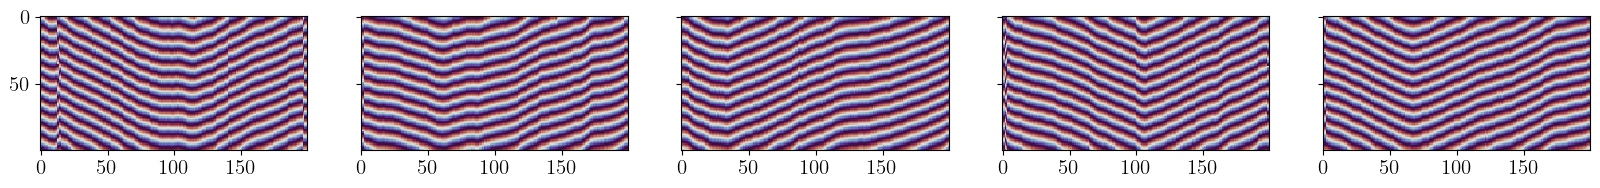

In [105]:
ratio = 0.25
n = 8

tau = 8.6*2
epsilon = tau*ratio 

tau_sigma = 0.01
epsilon_sigma = 0
c1 = 0
c2 = 3.5

sigma = 0.1
T = 1e5
dt = 0.1 
n_batches = int(T)
L = 200 

seeds = [None]*5

phases = [] 

fig, axes = plt.subplots(1, len(seeds), sharex=True, sharey=True, figsize=(20, 4))
for (i, seed) in enumerate(seeds): 
    m = sto_asym_density_field_1D(mu, nu, kappa, n, tau, epsilon, tau_sigma, epsilon_sigma, c1, c2, sigma)
    m.initialise(L, T, dt, n_batches, 0, noise_amp, seed)
    m.evolve() 

    phase = np.array(list(map(phase_transform, m.psi[-100:].T))).T
    phases.append(phase[-1])
    axes[i].imshow(phase, cmap='twilight', interpolation='None', vmin=-np.pi, vmax=np.pi)

plt.show() 

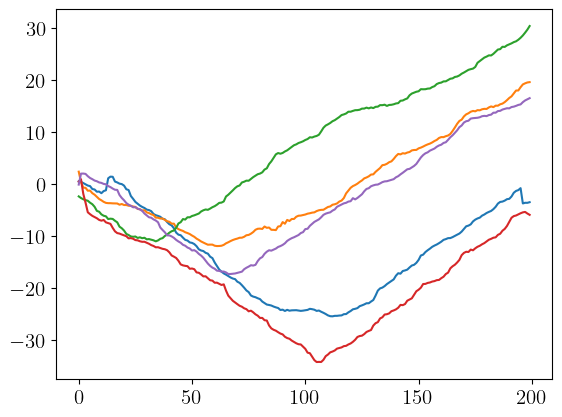

In [106]:
for p in phases: 
    shift(p)
    plt.plot(p)
plt.show() 

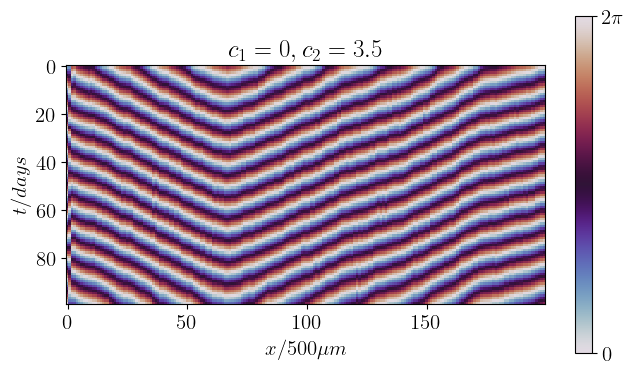

In [115]:
plt.figure(figsize=(7, 4))
plt.rc('font', size=15)
plt.rc('text', usetex=True)

phase = np.array(list(map(phase_transform, m.psi[-100:].T))).T

im = plt.imshow(phase % (2*np.pi), cmap='twilight', interpolation='None')
cbar = plt.colorbar(im)
cbar.set_ticks([0, 2*np.pi])
cbar.set_ticklabels([r'$0$', r'$2\pi$'])
plt.title(r'$c_1={}, c_2={}$'.format(c1, c2))
plt.xlabel(r'$x/500\mu m$')
plt.ylabel(r'$t/days$')
plt.tight_layout()
plt.savefig('Figures/1d_model.png', dpi=400)
plt.show() 